# Data Analysis in Python XIV: Advanced Analytics in Python

## Introduction


In this lesson, we will review examples of advanced analytics in Python (techniques not covered in this course but that are core techniques in descriptive, predictive and prescriptive analytics). 

Note: 
1. Use the TOC to navigate between sections.


## Descriptive Analytics

In [1]:
# import pandas library
import pandas as pd

# import seaborn library 
import seaborn as sns


# load the titanic data set from the seaborn library
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


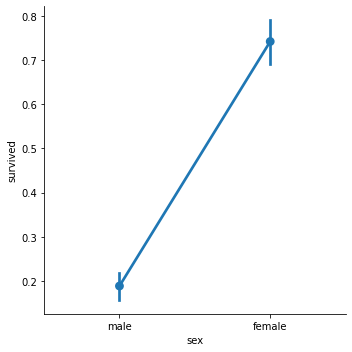

In [2]:
# survival probability by gender
sns.catplot(data = titanic, x='sex', y='survived', kind = 'point');

In [3]:
#import scipy for scientific calculations
from scipy import stats

males = titanic[titanic['sex']=='male']['survived']
females = titanic[titanic['sex']=='female']['survived']
fValue, pValue = stats.f_oneway(males, females)
print('The F value is: ' + str(round(fValue,5)))
print('------------------------')
print('The p value is: ' + str(pValue))

The F value is: 372.40572
------------------------
The p value is: 1.406066130879677e-69


## Predictive Analytics

In [4]:
# load car mileage data
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


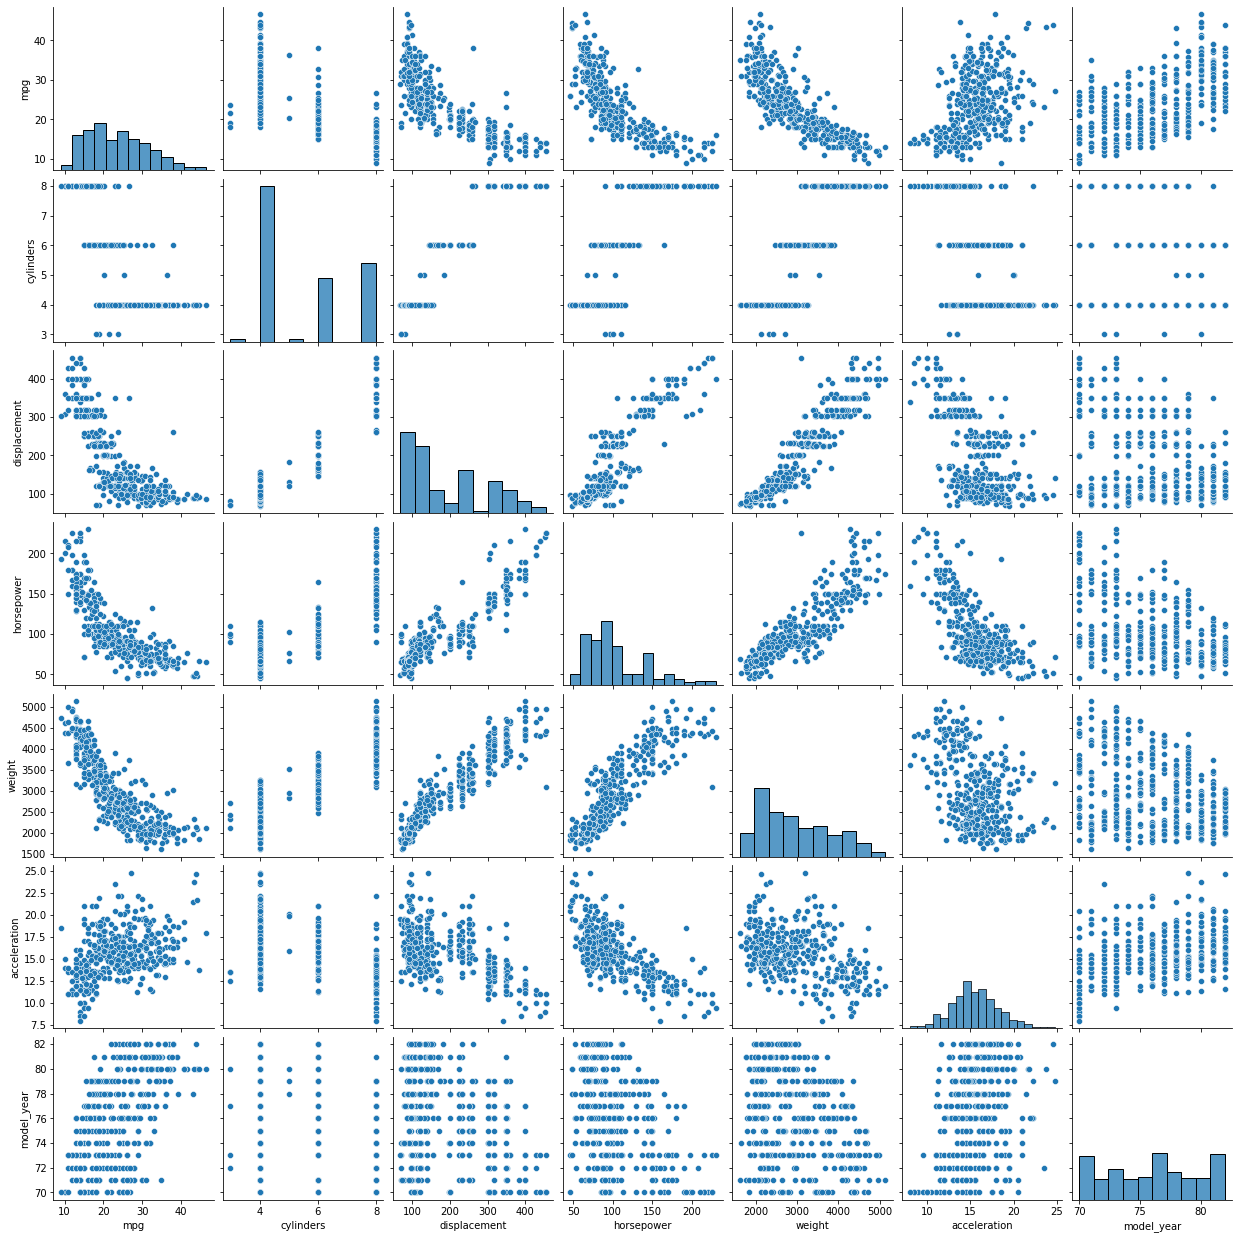

In [6]:
sns.pairplot(mpg);

In [30]:
import statsmodels.api as sm

# remove missing values
mpg_no_nulls = mpg.dropna()

# extract response
response = mpg_no_nulls['mpg']

# extract predictors and add constant to predictor variables
predictors = mpg_no_nulls.iloc[:,1:7]
predictors = sm.add_constant(predictors)

#fit linear regression model
model = sm.OLS(response,predictors ).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          3.79e-135
Time:                        11:35:30   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.5353      4.764     -3.051   

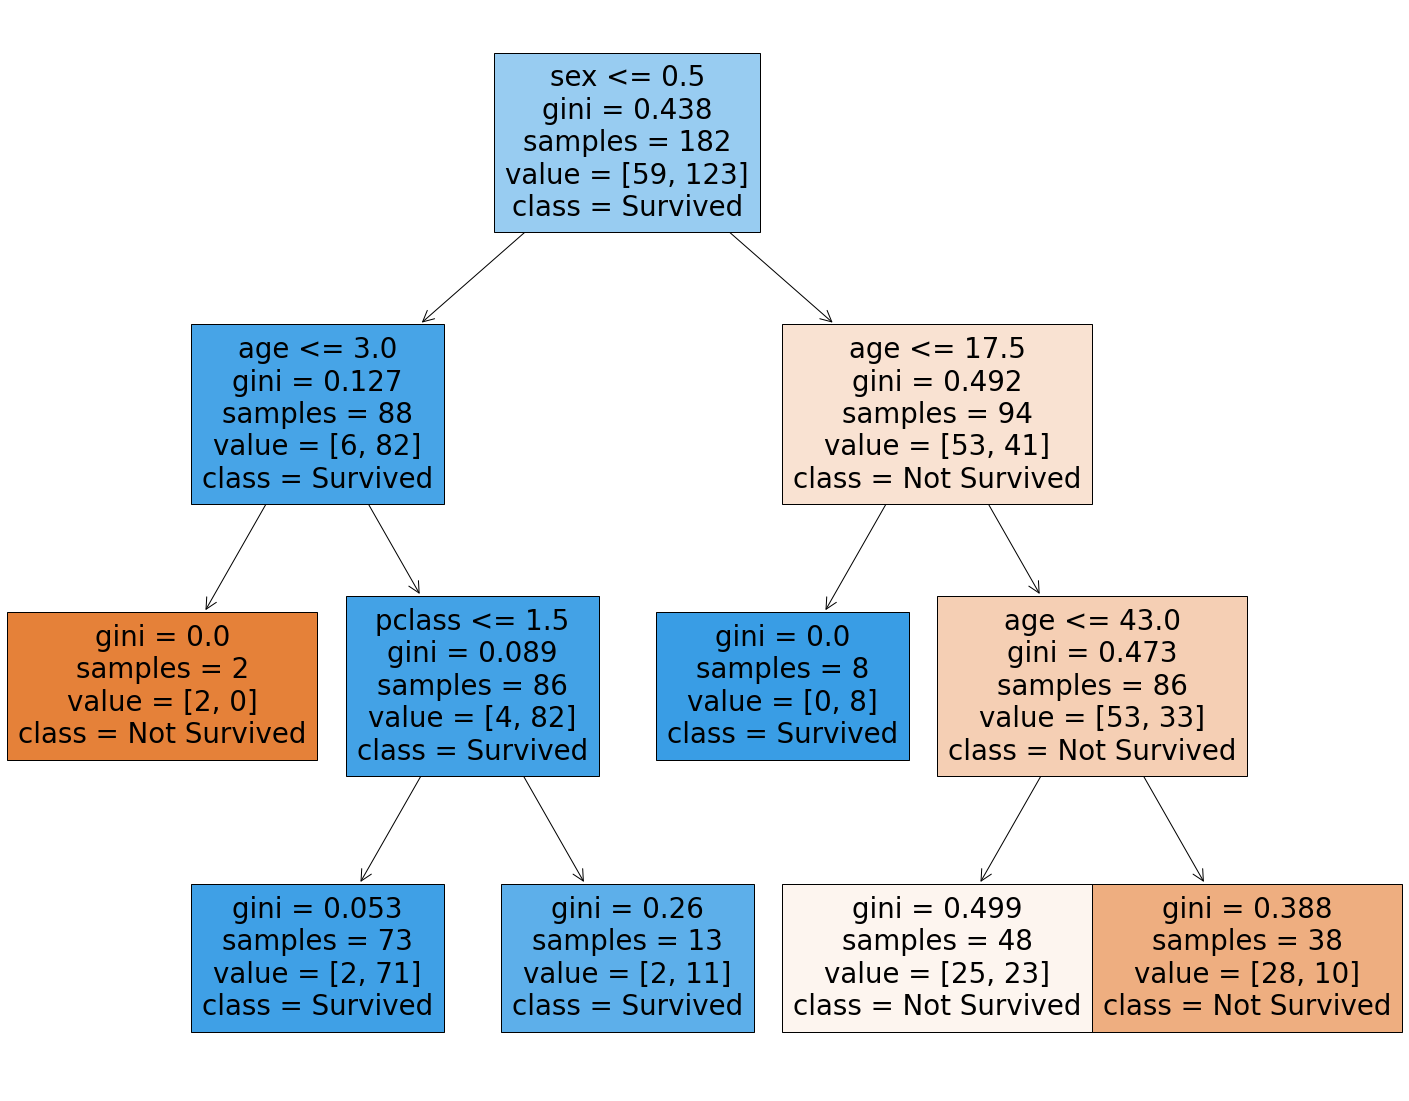

In [58]:
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn import preprocessing

clf = tree.DecisionTreeClassifier(max_depth=3)
response = titanic.dropna()['survived']
predictors = titanic.dropna()[['sex', 'age', 'pclass']]

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(predictors['sex'])
predictors['sex'] = label_encoder.transform(predictors['sex'])

model = clf.fit(predictors, response)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=['sex', 'age', 'pclass'],  
                   class_names=['Not Survived', 'Survived'],
                   filled=True)



## Prescriptive Analytics

In [61]:
"""
The Beer Distribution Problem for the PuLP Modeller

Authors: Antony Phillips, Dr Stuart Mitchell  2007

Problem setup: https://coin-or.github.io/pulp/CaseStudies/a_transportation_problem.html
"""


# Import PuLP modeler functions
from pulp import *

# Creates a list of all the supply nodes
Warehouses = ["A", "B"]

# Creates a dictionary for the number of units of supply for each supply node
supply = {"A": 1000, "B": 4000}

# Creates a list of all demand nodes
Bars = ["1", "2", "3", "4", "5"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {
    "1": 500,
    "2": 900,
    "3": 1800,
    "4": 200,
    "5": 700,
}

# Creates a list of costs of each transportation path
costs = [  # Bars
    # 1 2 3 4 5
    [2, 4, 5, 2, 1],  # A   Warehouses
    [3, 1, 3, 2, 3],  # B
]

# The cost data is made into a dictionary
costs = makeDict([Warehouses, Bars], costs, 0)

# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem", LpMinimize)

# Creates a list of tuples containing all the possible routes for transport
Routes = [(w, b) for w in Warehouses for b in Bars]

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route", (Warehouses, Bars), 0, None, LpInteger)

# The objective function is added to 'prob' first
prob += (
    lpSum([vars[w][b] * costs[w][b] for (w, b) in Routes]),
    "Sum_of_Transporting_Costs",
)

# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += (
        lpSum([vars[w][b] for b in Bars]) <= supply[w],
        f"Sum_of_Products_out_of_Warehouse_{w}",
    )

# The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += (
        lpSum([vars[w][b] for w in Warehouses]) >= demand[b],
        f"Sum_of_Products_into_Bar{b}",
    )

# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

# The optimised objective function value is printed to the screen
print("Total Cost of Transportation = ", value(prob.objective))


Status: Optimal
Route_A_1 = 300.0
Route_A_2 = 0.0
Route_A_3 = 0.0
Route_A_4 = 0.0
Route_A_5 = 700.0
Route_B_1 = 200.0
Route_B_2 = 900.0
Route_B_3 = 1800.0
Route_B_4 = 200.0
Route_B_5 = 0.0
Total Cost of Transportation =  8600.0
